Folgende Funktionen werden geplottet:
- f(x) = x**2 - x - 6
- f(x) = 2 * sin(x)
- f(x) = x + 1


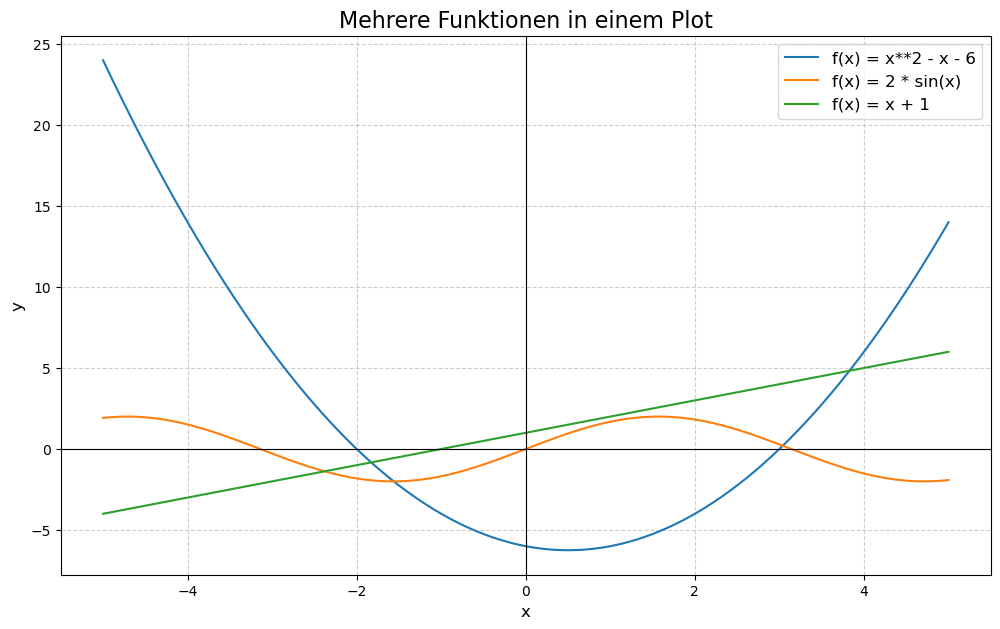

Folgende Funktionen werden geplottet:
- f(x) = exp(x)
- f(x) = log(x)


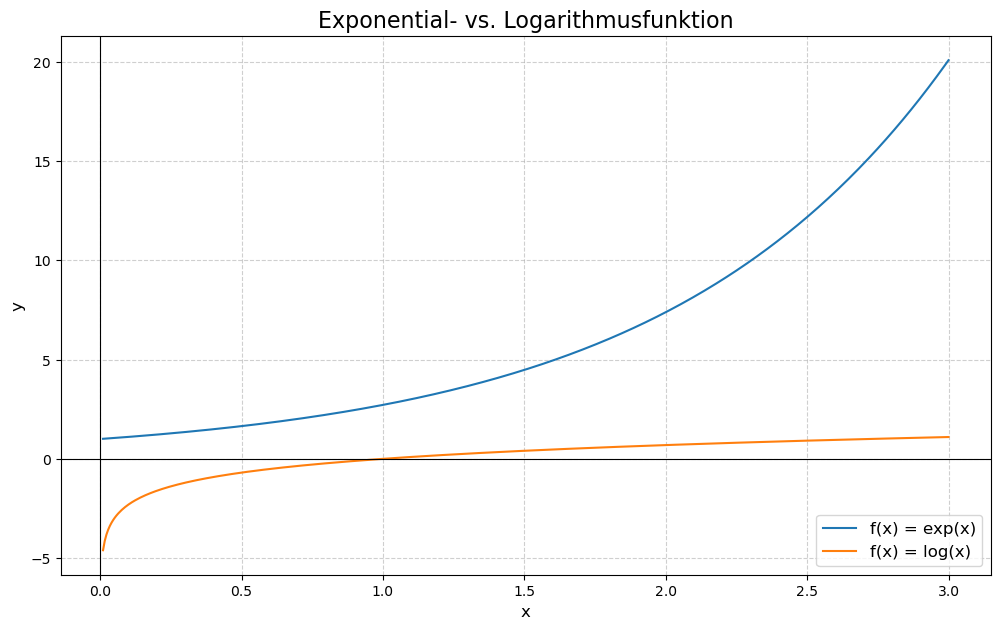

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

def plotte_mehrere_funktionen(formeln, plot_bereich=(-10, 10), titel="Funktionsgraphen", variable='x'):
    """
    Plottet mehrere Funktionen, die als Liste von Strings übergeben werden, in einem einzigen Diagramm.

    Args:
        formeln (list): Eine Liste von mathematischen Formeln als Strings (z.B. ["x**2", "sin(x)"]).
        plot_bereich (tuple): Ein Tupel (x_min, x_max) für den Bereich der x-Achse.
        titel (str, optional): Der Titel des Plots.
        variable (str, optional): Der Name der Variable in den Formeln.
    """
    # Erstelle eine Figur und eine Achse für den Plot
    plt.figure(figsize=(12, 7))

    # Definiere das mathematische Symbol
    var_symbol = sp.symbols(variable)

    # Erzeuge einen gemeinsamen Satz von x-Werten für alle Funktionen
    x_werte = np.linspace(plot_bereich[0], plot_bereich[1], 500)

    print("Folgende Funktionen werden geplottet:")

    # Gehe jede Formel in der Liste durch
    for formel in formeln:
        try:
            # Wandle den Formel-String in einen sympy-Ausdruck um
            funktion_expr = sp.sympify(formel)

            # Wandle den sympy-Ausdruck in eine schnelle, numerische Funktion um
            plot_func = sp.lambdify(var_symbol, funktion_expr, 'numpy')

            print(f"- f({variable}) = {formel}")

            # Berechne die y-Werte für die aktuellen x-Werte
            with np.errstate(divide='ignore', invalid='ignore'):
                y_werte = plot_func(x_werte)

            # Füge den Graphen der aktuellen Funktion zum Plot hinzu
            plt.plot(x_werte, y_werte, label=f'f({variable}) = {formel}')

        except (sp.SympifyError, SyntaxError) as e:
            print(f"Konnte die Formel '{formel}' nicht verarbeiten: {e}")

    # Formatiere den Plot
    plt.title(titel, fontsize=16)
    plt.xlabel(variable, fontsize=12)
    plt.ylabel('y', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.axhline(0, color='black', linewidth=0.8)
    plt.axvline(0, color='black', linewidth=0.8)

    # Füge die Legende hinzu, um die Graphen zu identifizieren
    plt.legend(fontsize=12)

    # Zeige den fertigen Plot an
    plt.show()


# --- ANWENDUNGSBEISPIEL ---
# Hier können Sie die Funktion ganz einfach verwenden.
if __name__ == '__main__':

    # 1. Erstellen Sie eine Liste mit den Formeln, die Sie plotten möchten
    funktionen_zum_plotten = [
        "x**2 - x - 6",  # Eine Parabel
        "2 * sin(x)",      # Eine Sinusfunktion
        "x + 1"            # Eine Gerade
    ]

    # 2. Rufen Sie die Funktion mit Ihrer Liste und dem gewünschten Bereich auf
    plotte_mehrere_funktionen(
        formeln=funktionen_zum_plotten,
        plot_bereich=(-5, 5),
        titel="Mehrere Funktionen in einem Plot"
    )